## Decision Trees 
* Introduction
* Recursive algorithms 
* Types of decision trees
* splitting criteria
* gini& entropy 
* dealing with overfitting 

In [71]:
def some_func(x):
    if x ==[]:
        return 0
    else:
        return 1+some_func(x[1:])

In [72]:
some_func([3,4,2,5])

4

In [81]:
def quicksort(array):
    if len(array)<2:
        return array
    else:
        pivot = array[0]
        smaller, bigger = [],[]
        for i in array[1:]:
            if i <=pivot:
                smaller.append(i)
            else:
                bigger.append(i)
        return quicksort(smaller)+[pivot]+quicksort(bigger)

In [82]:
quicksort([5,44,49,3,2,5,4,32,94,1,12,20])

[1, 2, 3, 4, 5, 5, 12, 20, 32, 44, 49, 94]

In [52]:
# !pip install ucimlrepo
import warnings 
warnings.filterwarnings('ignore')

In [53]:
from ucimlrepo import fetch_ucirepo 
wine = fetch_ucirepo(id=109) 
X = wine.data.features 
y = wine.data.targets

In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [55]:
data = pd.concat([X,y],axis=1)

In [56]:
data.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [57]:
x_train,x_test,y_train,y_test =train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=0, 
    stratify=y
)

In [58]:
y_train.value_counts()

class
2        50
1        41
3        33
Name: count, dtype: int64

In [59]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(
    n_estimators=100,
    random_state=1
)
forest.fit(x_train, y_train)
importances = forest.feature_importances_

In [60]:
importances

array([0.121041  , 0.01989148, 0.0125775 , 0.02049517, 0.03715273,
       0.04003254, 0.19382217, 0.00921146, 0.02642531, 0.12517892,
       0.07030285, 0.12356175, 0.20030712])

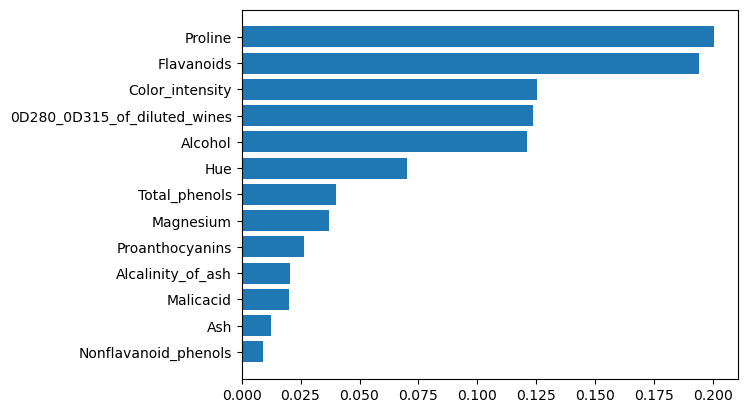

In [62]:
indices = np.argsort(importances)[::-1]
plt.barh(x_train.columns[indices][::-1],importances[indices][::-1])
plt.show()

In [66]:
feature_importance = pd.DataFrame({
    'predictor':x_train.columns[indices][::-1],
    'score':importances[indices][::-1]
}).sort_values('score',ascending = False)
display(feature_importance)

,predictor,score
12,Proline,0.200307
11,Flavanoids,0.193822
10,Color_intensity,0.125179
9,0D280_0D315_of_diluted_wines,0.123562
8,Alcohol,0.121041
7,Hue,0.070303
6,Total_phenols,0.040033
5,Magnesium,0.037153
4,Proanthocyanins,0.026425
3,Alcalinity_of_ash,0.020495


In [67]:
forest.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1791095845),
 DecisionTreeClassifier(max_features='sqrt', random_state=2135392491),
 DecisionTreeClassifier(max_features='sqrt', random_state=946286476),
 DecisionTreeClassifier(max_features='sqrt', random_state=1857819720),
 DecisionTreeClassifier(max_features='sqrt', random_state=491263),
 DecisionTreeClassifier(max_features='sqrt', random_state=550290313),
 DecisionTreeClassifier(max_features='sqrt', random_state=1298508491),
 DecisionTreeClassifier(max_features='sqrt', random_state=2143362693),
 DecisionTreeClassifier(max_features='sqrt', random_state=630311759),
 DecisionTreeClassifier(max_features='sqrt', random_state=1013994432),
 DecisionTreeClassifier(max_features='sqrt', random_state=396591248),
 DecisionTreeClassifier(max_features='sqrt', random_state=1703301249),
 DecisionTreeClassifier(max_features='sqrt', random_state=799981516),
 DecisionTreeClassifier(max_features='sqrt', random_state=1666063943),
 DecisionTreeCl

All these decision trees are different from each other. In random forest, there are two random aspects, 
* boostrap sample
* random subset of features

## <font color=red> Model Parameters

**n_estimators** : default is 100 : The number of trees in the forest

**criterion**: gini, entropy, log_loss : default gini

**max_depth** :(int) maximum depth of the tree. if None, then the nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. 

**min_samples_split**(int or float):default is 2; The minimum number of samples required to split an internal node 
* If int, then consider min_samples_split as the minimum number 
* if float, the min_samples_split is a fraction: 
    *ceil(min_samples_split* n_samples)
    
**min_samples_leaf**: int or float ; default is 1
* The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

**min_weight_fraction_leaf** : float, default 0 
* The minimum weighted fraction of the sum total of weights(of all input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided. 

**max_features{“sqrt”, “log2”, None}, int or float, default=”sqrt”
The number of features to consider when looking for the best split:**
* If int, then consider max_features features at each split.
* If float, then max_features is a fraction and max(1, int(max_features * n_features_in_)) features are considered at each split.
* If “sqrt”, then max_features=sqrt(n_features).
* If “log2”, then max_features=log2(n_features).
* If None, then max_features=n_features.

**max_leaf_nodes** : int default is None

**min_impurity_decrease** : float , default is 0.0 
* A node will be split if this split induces a decreases of the impurity greater than or equal to this value. 

**bootstrap** :Whether bootstrap samples are used when building trees. IF False, the whole dataset is used to build each tree. 

**oob_score** : bool or callable, default = False
* Whether to use out-of-bag samples to estimate the generalization score. By default accuracy_score is used. Provide a callable with signature metric(y_true,y_pred) to use a custom metric. Only available if bootstrap =True

**n_jobs**

**random_state**

**verbose**

**warm_start** bool ; default is False: When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.

**class_weight**: balanced,balanced_subsample,dict,list_of_dicts

**ccp_alpha**: non-negative float , default 0.0
* complexity parameter used for minimal cost-complexity pruning. The subtree with the largest const complexity that is smaller than ccp_alpha will be chosen.

**max_samples** int or float, default=None
* If bootstrap is True, the number of samples to draw from X to train each base estimator.
* If None (default), then draw X.shape[0] samples.
* f int, then draw max_samples samples.
* If float, then draw max(round(n_samples * max_samples), 1) samples. Thus, max_samples should be in the interval (0.0, 1.0].

Note : **(Difference between min_samples_split & min_samples_leaf)**
If min_samples_split = 5, and there are 7 samples at an internal node, then the split is allowed. But let's say the split results in two leaves, one with 1 sample, and another with 6 samples. If min_samples_leaf = 2, then the split won't be allowed (even if the internal node has 7 samples) because one of the leaves resulted will have less then the minimum number of samples required to be at a leaf node.

### <font color=red> Random Forest Feature Importance
* Method A :`Impurity -based feature importance`
    * For a given feature 
        * For each tree:
            * Compute impurity decrease (Gini, Entropy) 
            * Weight by number of examples at that node 
            * Average all all trees
        * Normalize importances so that sum of feature importances sum to 1 
    * Note : Impurity-based feature importance are inflated for categorical features with lots of unique values. 
    * Note : Correlated features share importance.
    
* Method B : `Permutation Importance`
    * Bootrap Sampling (Sampling with replacement)
    * Out-of-bag accuracy: 
        * During training , for each tree, make prediction for OOB sample (~1/3 of the training data) 
        * Based on those predictions where example i was OOB, compute label via majority vote among the trees that did not use example i during model fitting.
        * The proportion over all examples were the prediction (by majorith vote) is correct is the OOB accuracy estimate. 
    * Out-of-bag feature importance via permutation 
        * Count votes for correct class 
        * Given feature i, permute this feature in OOB examples of a tree. 
        * Compute the number of correct votes after permutation from the number of votes before permutation for given tree. 
        * Repeat for all trees in the random forest and average the importance 
        * Repeat for other features


## <font color='red'> Pruning a tree 

* A smaller tree with fewer splits may lead to lower variance and better interpretation at the cost of higher bias 
* A better strategy is to grow a very large tree, this may produce good predictions on the training set, but is likely to overfit the data, leading to poor test set performance. 

* Cost Complexity pruning - Post Pruning.


 # Decision Trees 

 * It is a binary tree that recursively splits the datset until we are left with pure leaf nodes, that is the data with only one type of class. 
 *  Decision Trees are a non-parametric supervised learning method used for both classification and regression tasks. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
 * It is true that the tree is just a bunch of if else statement, But there exist many such trees to split the given data, so we have to find the optimal one.Thats why we this is considered as a machine learning algorithm.
 * Model will choose the split which maximises the information gain. 
 * Entropy is the measure of information contained in a state.If entropy is high, then we are very uncertain about the randomly picked point and we need more bits to descrive the statse.
 * Pure node is the node where entropy is minimum 
 
 To decide which attribute should be at the root node we can start by splitting the dataset wrt each feature and compute the gini impurity score. Consider the following splits based on three features.  

 <img src='https://miro.medium.com/max/980/1*S4byQQs8X2rNhJv4qm73uw.png'>
 <img src = 'https://miro.medium.com/max/980/1*j7WkOMGSLd17P_wlO_cRhw.png'> 

### Gini Impurity 
The Gini impurity is a measurement of the likelihood of incorrect classification of a new instance of a random variable, if that new instance were randomly classified according to the distribution of class labels from the data set. The lower the Gini score the better.
<img src = 'https://miro.medium.com/max/445/1*y78T1YV8wrb-DPbmNk2rKA.png'> 

<img src='https://miro.medium.com/max/980/1*3SMk52FU2a3TrDysEu7dkQ.png'> 

Suppose “Fever” has the lowest Gini impurity with a score of 0.386. In other words, “Fever” separates patients with and without flu the best.

<img src = 'https://miro.medium.com/max/850/1*uvngcDnw_vla-jWnFyyIJg.png'> 

We can apply this process to the right node as well. If the node itself has the lowest score then there is no point in separating the patients anymore and the node becomes the leaf node. This method is applied down the tree until we are only left with leaf nodes.

## Decision Tree with Numeric Values
What if the “Yes”/”No” answers in “Fever” were replaced with actual temperature readings ? How would we compile the tree then? Don’t panic, the process very similar to before. First we sort the values of the attribute in ascending order (smallest to largest). Then we compute the average for all adjacent patients. For example, if the first two values were 10 and 20, we’d get the average of those two values (average = (10+20)/2 = 15) and insert the value in between 10 and 20.
<img src = 'https://miro.medium.com/max/904/1*EWeBpqTq7_XhqvnSJwsMjg.png'>
Once we have inserted all the averages, we can use the averages to create a tree with a root node and two leaf nodes. In the picture above we have selected the value 37.5 (average of 37 and 38) and used it as the attribute in the root node. It asks the question: which patients have a fever less than 37.5 degrees celsius? If the answer is Yes (True) then it goes into the left node, otherwise it goes into the right node. Can you see that we follow the same notion as before. After fulfilling our node we must calculate the Gini impurity score for the node (with “Fever < 37.5” as the attribute). To obtain the Gini score we do the same as before: calculate Gini scores for the leaf nodes and then using weighted average methods we get the Gini impurtiy score for the root node.
This process is done for all averages. The average which returns the lowest Gini impurity score is selected to be the cut-off value in the root node or parent node.

## Notes: 
 * decision tree contains two nodes decision nodes and leaf nodes. Decision nodes contain condition and the condition is defined by feature index and the threshold value for that particular feature. 
 * The model tranverses through every feature and feature value for finding the best splitting condition which maximises the  information gain. 

## Entropy 
Entropy is a measure of information that indicates the disorder of the features with the target

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR9d1OavwqcVz7tyymnWsnFHXRbOoKZunUumy4O3ziO_n7PReea87ixH400xaSC5RWzXQ&usqp=CAU"> 

## Information gain
The difference between entropy before and after splitting
<img src='https://qph.fs.quoracdn.net/main-qimg-dfad11c548327127fadd25ff992ace92'>

## Decision Tree Regressor 

The algorithm follows almost same process the difference lies in how we measure the information gain and how we make the prediction. Suppose our new data point reaches a particular leaf node. To make the prediction for regression problem we take the average value of y values in the node. 

To find the best split and threshold in decision tree regressor we use variance as a measure of impurity.(Just like entropy or gini index in the classification problem)

$VarReduction  = Var(parent) - \sum{w_i}* Var(child)$

#### Note : Decision Tree Split for numerical variables 
 * First we sort the feature then we go through all the unique feature values and compute the information gain.
 * decision tree takes a lot of time to train if we have numerical feature. 
 * time complexity will be increasing as the input is increasing. 
 * decision trees are the base of many ensemble tenchiques 
 * Decision Trees are robust to outliers because decision trees divide items by lines, so it does not difference how far is a point from lines.Most likely outliers will have a negligible effect because the nodes are determined based on the sample proportions in each split region (and not on their absolute values).

### Decision tree pruning 
As the names suggest, pre-pruning or early stopping involves stopping the tree before it has completed classifying the training set and post-pruning refers to pruning the tree after it has finished.
 * full depth decision tree leads to overfitting. Full depth tree can learn the training data exactly. But the new data point that differs very slightly might not be predicted well.
 
 * 

## Practise Questions 

 * How does decision tree works(entropy, inf gain, how to construct the tree, gini impurity) 
 * Understand the formula 
 * how to construct the tree with respect to categorical and numberical features 
 * What is the impact of outliers in decision tree 
 * Decision tree has low bias and high variance 
 * what is low bias and high variance. 
 * generalization error 
 * bias variance trade off 
 * full depth decision tree --> getting high variance 
 * how to convert high variance to low variance 
 * decision tree pruning 
 * How to perform pruning 
 * which all libraries you will use 
 * visualizaiton stuffs 
 * How decision tree regressor works 